## Loading required data and libraries

In [1]:
#Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import random

C:\Users\ktaey\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Link to download the required data provided by Instacart

“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on July 18, 2017.

### Note

- The data at the link keeps changing therefore we have uploaded the first dataset we used, to a dropbox **link:
https://www.dropbox.com/sh/jt2l9k6sd6qlebu/AACx8UgigXpfM87_Nsl7mh34a?dl=0**

- We have also included the extra data files in which we have added assumed prices for each products.

- Please have all the files in the above in your current working directory for the code to work as intended

In [2]:
#Importing All Raw Data Files
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
#order_products_prior = pd.read_csv("instacart_2017_05_01/order_products__prior.csv")
#order_products_train = pd.read_csv("instacart_2017_05_01/order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

File containing prices for products is provided separately in a csv file named - 'master_products.csv'. Please be sure to place this file in your working directory.

## Which department constitutes the major proportion of their purchase?

The purpose of this analysis is to identify customers who are purchasing products in a specific department and give them incentives to maximize revenue for Instacart. For example, is one customer visits 10 dairy departments and 5 other departments, that means that customer is using dairy departments the most, and about 66% of his/her time has been spent in a dairy department.

### Computational Steps
1. First, from the order data, we calculated which departments the customers visit per order. We deleted all duplicates in this stage. For example, if two vegetables were purchased in one order, we regarded it as if the customer visited the vegetable department one time in that order.

2. We grouped data by ‘user id’ level. Since we needed to figure out the number of visits by each user, we aggregated the data set.

3. We figured out which departments the customers visit the most by each customer level, the total number of visits for all departments, and the total number of visits for the specific department that the customer visits most.

4. We calculated the utilization of specific departments compared to all departments and selected customers only over 30% of utilization, since we regard those customers as frequent users for a specific department.

5. Based on pricing data, we figured out how much of the revenue has been generated from those specific customers, and what the expected revenue growth is from future strategy. (Expected growth percent is from external research, which is 15%.)


#### Aggregating Data

In [3]:
import pandas as pd
departments = pd.read_csv("master_products.csv", usecols=["department_id","department","min","max"])
departments = departments.sort_values('department_id', ascending=False).drop_duplicates('department_id').sort_index()
aisle = pd.read_csv("aisles.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [4]:
products_aisle = products.merge(aisle, on="aisle_id", how='inner')
products_aisle_departments = products_aisle.merge(departments, on="department_id", how="inner")


In [5]:
order_prior_all = order_products_prior.merge(products_aisle_departments, on="product_id", how="left")

In [6]:
order_prior_all_final = orders.merge(order_prior_all, on="order_id", how="inner")

In [7]:
userid_department = order_prior_all_final[["user_id", "order_number","department"]]
userid_department_group = userid_department.groupby(["user_id","order_number","department"]).count()

In [8]:
userid_department_group = userid_department_group.reset_index()
userid_department_final = userid_department_group.groupby(["user_id","department"]).count().reset_index()
userid_department_final.sort_values(["user_id","order_number"], ascending = False)
userid_department_final_1 = pd.pivot_table(userid_department_final,index=["user_id"],columns=["department"], values=["order_number"])

In [9]:
userid_department_final_2 = userid_department_final_1["order_number"]

#### Finding maximum and minimum values

In [10]:
userid_department_final_2["Max"] = userid_department_final_2.apply(np.max, axis=1)
userid_department_final_2["Total"] = userid_department_final_2.apply(np.sum, axis=1)

C:\Users\ktaey\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ktaey\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
department_set = list(set(order_prior_all_final["department"]))

In [12]:
def MaxValue(row):
    a = []
    for i in department_set:
        if row[i] == row["Max"]:
            return i

In [13]:
userid_department_final_2["Max Value"] = userid_department_final_2.apply(MaxValue, axis = 1)

C:\Users\ktaey\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Creating a chart to figure out the overall distribution

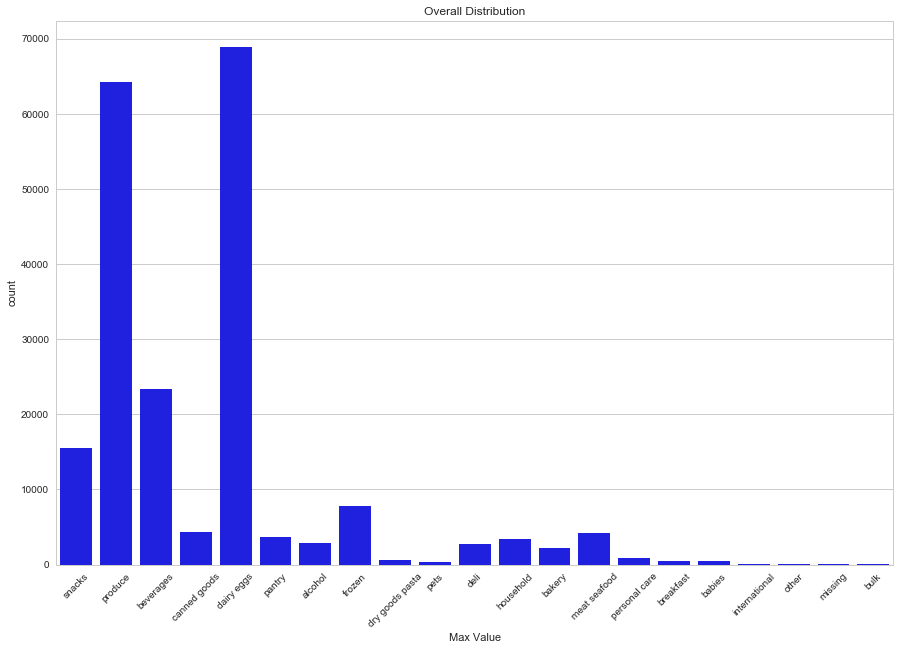

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(userid_department_final_2["Max Value"], color = "blue")
plt.xticks(rotation = 45)
ax.set_title("Overall Distribution")


#### Figuring out the utilization distribution

In [15]:
def percentage(row):
    return float(row["Max"]) / row["Total"]

In [16]:
userid_department_final_2["Percent"] = userid_department_final_2.apply(percentage, axis = 1)

C:\Users\ktaey\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


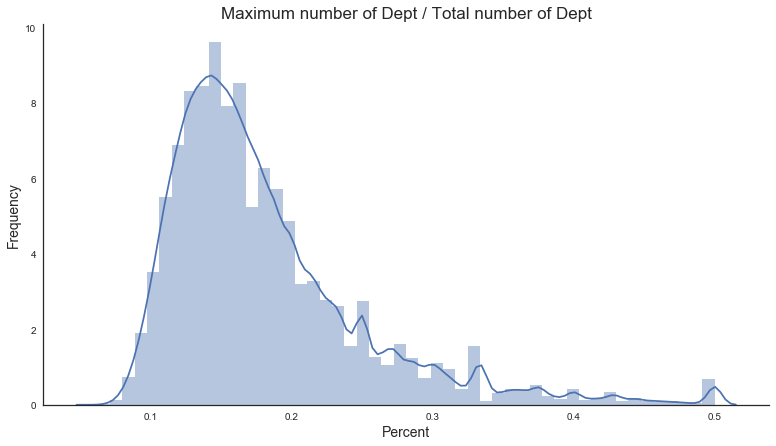

In [17]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (13,7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Maximum number of Dept / Total number of Dept", fontsize = 17)
ax.set_ylabel("Frequency", fontsize = 14)
ax.set_xlabel("Percent", fontsize = 14)

sns.distplot(userid_department_final_2["Percent"], kde=True)

#### Pick up the cutting point as 0.3, and find the distribution of products from those customers

In [18]:
userid_department_final_2_30 = userid_department_final_2[userid_department_final_2["Percent"] > 0.3]
userid_30 = pd.DataFrame(userid_department_final_2_30.reset_index()[["user_id","Max Value"]])
userid_30_master = userid_30.merge(order_prior_all_final, on = "user_id", how="left")
userid_30_master = userid_30_master[userid_30_master["Max Value"] == userid_30_master["department"]]

In [19]:
def price(row):
    a = np.random.choice(range(row["min"],row["max"]))
    return a

In [20]:
userid_30_master["Price"] = userid_30_master.apply(price, axis = 1)

In [21]:
userid_30_master_agg = userid_30_master.groupby("department").sum().reset_index()[["department","Price"]]
userid_30_master_agg = userid_30_master_agg.sort_values("Price",ascending=False)

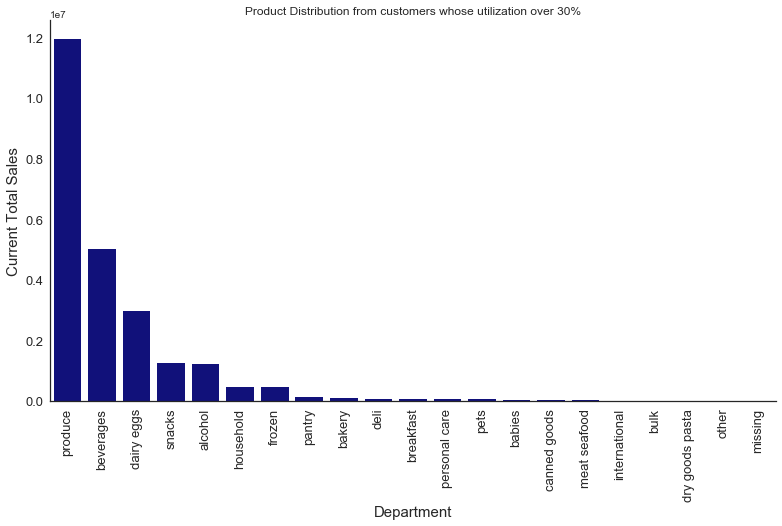

In [22]:
fig, ax = plt.subplots(figsize = (13,7))

plt.xticks(rotation = 90)

sns.barplot(x = userid_30_master_agg["department"], y = userid_30_master_agg["Price"], color="darkblue")
plt.xticks(fontsize= 13)
plt.yticks(fontsize = 13)
ax.set_xlabel("Department", fontsize = 15)
ax.set_ylabel("Current Total Sales", fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Product Distribution from customers whose utilization over 30%")

#### Revenue generated from customers whose utilization is over 30

In [23]:
userid_30_master_agg_agg = np.sum(userid_30_master_agg["Price"])
userid_30_master_agg_agg

23966984

#### Expected Revenue Growth

In [24]:
userid_30_master_agg_agg_15 = userid_30_master_agg_agg * 1.15
userid_30_master_agg_agg_15

27562031.599999998